In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
X = pd.read_csv("Linear_X_Train.csv").values
Y = pd.read_csv("Linear_Y_Train.csv").values

In [6]:
print(X.shape, Y.shape)

(3750, 1) (3750, 1)


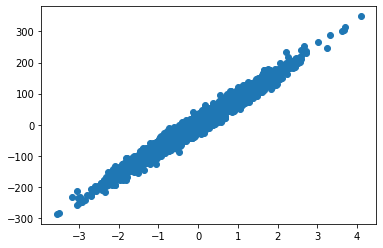

In [7]:
plt.scatter(X,Y)
plt.show()

In [33]:
def hypothesis(x,theta):
    return x*theta[1]+theta[0]

def gradient(X, Y , theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x ,theta)
        y = Y[i]
        
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*x
    return grad/m

def error(X,Y, theta):
    m = X.shape[0]
    total_error = 0
    for i in range(m):
        y_ = hypothesis(X[i],  theta)
        total_error+=((y_-Y[i])**2)
    return total_error/m




In [34]:
def gradientDescent(X,Y, lr = 0.1,max_step=100):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_step):
        grad = gradient(X,Y , theta)
        err = error(X,Y ,theta)
        
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        
        error_list.append(err)
        theta_list.append(theta)
        
    return error_list , theta_list , theta

In [35]:
error_list , theta_list , theta = gradientDescent(X,Y)

In [36]:
theta_list[1]

array([ 3.72687896, 80.54086647])

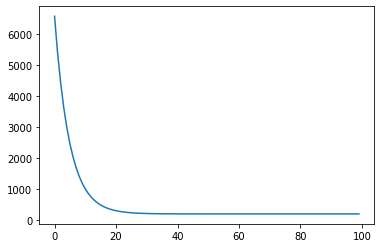

In [37]:
plt.plot(error_list)
plt.show()

In [38]:
y_ = hypothesis(X,theta)

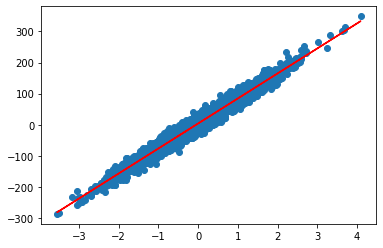

In [39]:
plt.scatter(X,Y)
plt.plot(X,y_ , c = "red")
plt.show()

In [40]:
def r2_score(y,y_):
    
    num  = np.sum((y-y_)**2)
    deno = np.sum((y-y.mean())**2)
    accuracy = 1-(num/deno)
    return accuracy

In [42]:
r2_score(Y,y_)

0.970961222084104